In [1]:
using MarkovRandomFields, MarkovRandomFields.Models,
    MarkovRandomFields.MCMC
using Graphs, IndexedFactorGraphs
using Statistics
using ProgressMeter

In [ ]:
function estimate_magnetization(L, β, nsamples, n_warmup)
    J = adjacency_matrix(grid((L,L); periodic=true))
    model = MarkovRandomField(Ising(J, zeros(L^2), β))
    nchains = Base.Threads.nthreads()
    samples_bundle = sample(model, MHSampler(model), MultiThread(), 
        nsamples, nchains; nwarmup)
    spin = MarkovRandomFields.Models.potts2spin
    avg_magnetiz = mean(abs, mean.(spin, mean.(samples_bundle)))
    return avg_magnetiz
end

estimate_magnetization (generic function with 1 method)

In [ ]:
nsamples = 10^4
nwarmup = 10^2
βs = 0.3:0.03:0.7
Ls = [10, 30]
ms = [zeros(length(βs)) for _ in Ls]

for (i, L) in enumerate(Ls)
desc="Sampling L=$L, $i of $(length(Ls))"
    @showprogress desc for (j, β) in enumerate(βs)
        ms[i][j] = estimate_magnetization(L, β, nsamples, nwarmup)
    end
end

Sampling L=10, 1 of 2 100%|██████████████████████████████| Time: 0:00:11
Sampling L=30, 2 of 2 100%|██████████████████████████████| Time: 0:01:28


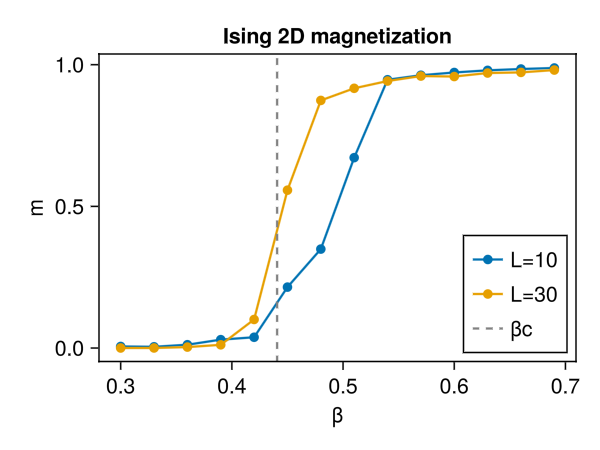

In [28]:
using GLMakie
GLMakie.activate!(inline=true)

fig = Figure(size=(400,300))
ax = Axis(fig[1, 1],
    title = "Ising 2D magnetization", xlabel="β", ylabel="m", 
    xgridvisible=false, ygridvisible=false)

for (i, L) in enumerate(Ls)
    scatterlines!(ax, βs, ms[i], label="L=$L")
end

vlines!(ax, [log(1+sqrt(2))/2], label="βc", linestyle=:dash, color="gray")

axislegend(ax, position=:rb)
fig